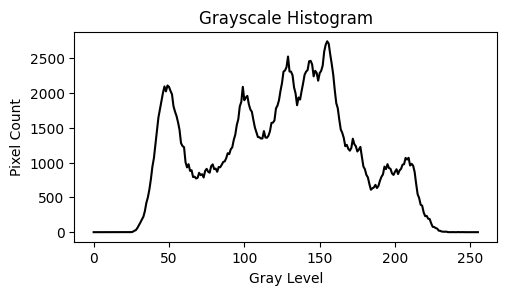

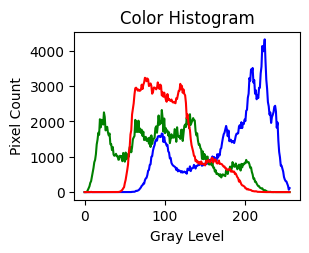

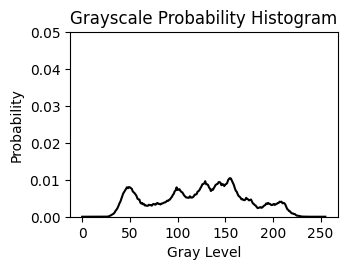

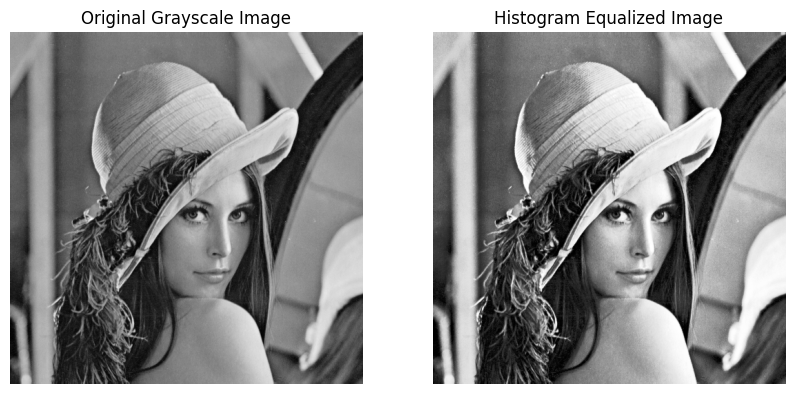

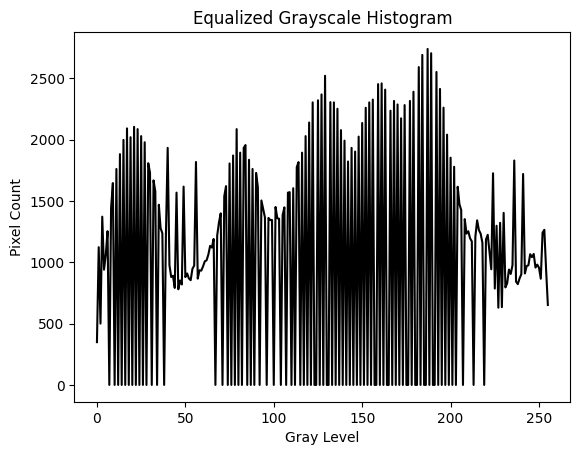

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def plot_histogram(image, title, method='count'):
    if len(image.shape) == 2:
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
        plt.plot(hist, color='black')
    else:
        colors = ('b', 'g', 'r')
        for i, color in enumerate(colors):
            hist = cv2.calcHist([image], [i], None, [256], [0, 256])
            plt.plot(hist, color=color)

    plt.title(title)
    plt.xlabel("Gray Level")
    plt.ylabel("Pixel Count" if method == 'count' else "Probability")
    if method == 'probability':
        plt.ylim(0, 1)
    plt.show()

def histogram_analysis(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    plt.figure(figsize=(12, 6))
    plt.subplot(2, 2, 1)
    plot_histogram(gray_image, "Grayscale Histogram")

    plt.subplot(2, 2, 2)
    plot_histogram(image, "Color Histogram")


    hist_gray = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
    hist_gray /= hist_gray.sum()
    plt.subplot(2, 2, 3)
    plt.plot(hist_gray, color='black')
    plt.title("Grayscale Probability Histogram")
    plt.xlabel("Gray Level")
    plt.ylabel("Probability")
    plt.ylim(0, 0.05)

    plt.tight_layout()
    plt.show()

    equalized_image = cv2.equalizeHist(gray_image)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title("Original Grayscale Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(equalized_image, cmap='gray')
    plt.title("Histogram Equalized Image")
    plt.axis("off")

    plt.show()


    plt.figure()
    plot_histogram(equalized_image, "Equalized Grayscale Histogram")


image_path = "Lena_Image.png"
histogram_analysis(image_path)


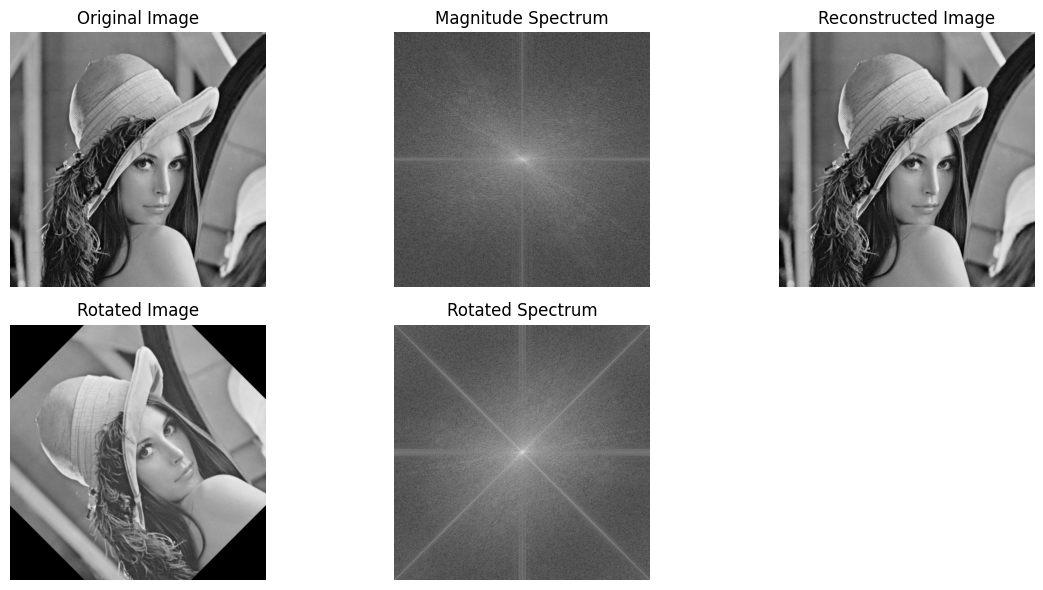

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_fft(image):
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20 * np.log(np.abs(dft_shift) + 1)
    return dft, dft_shift, magnitude_spectrum

def compute_ifft(dft_shift):
    dft_ishift = np.fft.ifftshift(dft_shift)
    img_reconstructed = np.fft.ifft2(dft_ishift)
    img_reconstructed = np.abs(img_reconstructed)
    return img_reconstructed

def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, matrix, (w, h))
    return rotated

def plot_images(original, magnitude_spectrum, reconstructed, rotated, rotated_spectrum):
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 3, 1)
    plt.imshow(original, cmap='gray')
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(2, 3, 2)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title("Magnitude Spectrum")
    plt.axis("off")

    plt.subplot(2, 3, 3)
    plt.imshow(reconstructed, cmap='gray')
    plt.title("Reconstructed Image")
    plt.axis("off")

    plt.subplot(2, 3, 4)
    plt.imshow(rotated, cmap='gray')
    plt.title("Rotated Image")
    plt.axis("off")

    plt.subplot(2, 3, 5)
    plt.imshow(rotated_spectrum, cmap='gray')
    plt.title("Rotated Spectrum")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

def main(image_path):

    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    dft, dft_shift, magnitude_spectrum = compute_fft(image)

    reconstructed_image = compute_ifft(dft_shift)

    rotated_image = rotate_image(image, 45)
    _, _, rotated_spectrum = compute_fft(rotated_image)

    plot_images(image, magnitude_spectrum, reconstructed_image, rotated_image, rotated_spectrum)


image_path = "Lena_Image.png"
main(image_path)
